# Import Required Libraries
Import the necessary libraries, including GeoPandas, Shapely, and Pandas.

In [13]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas as gpd
from pathlib import Path

from PIL import Image
import matplotlib.pyplot as plt

data_path = Path('London_UK')

# Load data
panoids = gpd.read_file(data_path / 'panoids/panoids.geojson')
network = gpd.read_file(data_path / 'network/edges/edges.geojson')

# Load Street Network Data
Load the street network data from a GeoJSON file or other data source.

In [14]:
# Load Street Network Data
streets = network  # Replace with your data source

# Load Image GPS Coordinates
Create a DataFrame with image IDs and their corresponding GPS coordinates.

In [19]:
# Load Image GPS Coordinates
# Create a DataFrame with image IDs and their corresponding GPS coordinates

image_data = {
    'image_id': np.linspace(0, len(panoids) - 1, len(panoids)),
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Create GeoDataFrame for Images
Convert the DataFrame to a GeoDataFrame with Point geometries and set the coordinate reference system (CRS).

In [20]:
# Create GeoDataFrame for Images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Perform Spatial Join
Use the sjoin_nearest function to find the nearest street for each image and add the distance information.

In [48]:
# Perform Spatial Join
matched = gpd.sjoin_nearest(images_gdf, streets, how='left', distance_col='distance')

# Now 'matched' contains street information for each image
matched[['image_id', 'longitude', 'latitude', 'distance'][:5][0:2]]
matched_first_row = matched.iloc[[8]]

print(matched_first_row[['image_id', 'longitude', 'latitude', 'distance']])


c:\Users\lucia\anaconda3\envs\dsaie\lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


   image_id  longitude   latitude  distance
8       8.0  -0.111446  51.510339  0.000574


In [49]:
def get_image_id_by_coords(lat, lon):
    # Find the row in the matched DataFrame that matches the given coordinates
    row = matched[(matched['latitude'] == lat) & (matched['longitude'] == lon)]
    
    if not row.empty:
        return row['image_id'].values[0]
    else:
        return None

# Example usage
latitude = 51.51033857385067  # Replace with the desired latitude
longitude = -0.1114464626242011  # Replace with the desired longitude
image_id = get_image_id_by_coords(latitude, longitude)

if image_id is not None:
    print(f"Image ID for coordinates ({latitude}, {longitude}): {image_id}")
else:
    print(f"No image found for coordinates ({latitude}, {longitude})")

Image ID for coordinates (51.51033857385067, -0.1114464626242011): 8.0


# Display Matched Results
Print or visualize the matched results, including image IDs and distances to the nearest streets.

      image_id      distance
0          0.0  4.727227e-04
1          1.0  4.652413e-04
2          2.0  4.817731e-04
3          3.0  1.958920e-05
4          4.0  3.804349e-06
...        ...           ...
9008    9008.0  9.611725e-06
9009    9009.0  7.151419e-06
9010    9010.0  3.945103e-06
9011    9011.0  4.789095e-07
9012    9012.0  5.151160e-06

[9135 rows x 2 columns]


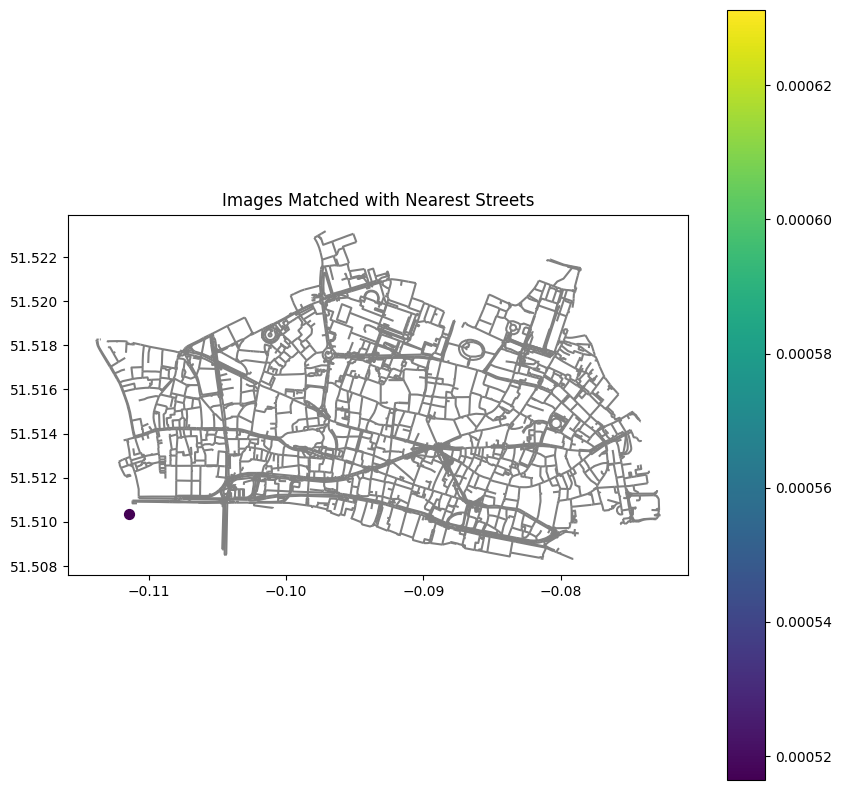

In [50]:
# Display Matched Results

# Print the matched results, including image IDs and distances to the nearest streets
print(matched[['image_id', 'distance']])

# Optionally, visualize the matched results on a map
import matplotlib.pyplot as plt

# Plot the streets
base = streets.plot(color='gray', figsize=(10, 10))

# Plot the images with distances
matched_first_row.plot(ax=base, column='distance', legend=True, cmap='viridis', markersize=50)

plt.title('Images Matched with Nearest Streets')
plt.show()

c:\Users\lucia\anaconda3\envs\dsaie\lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


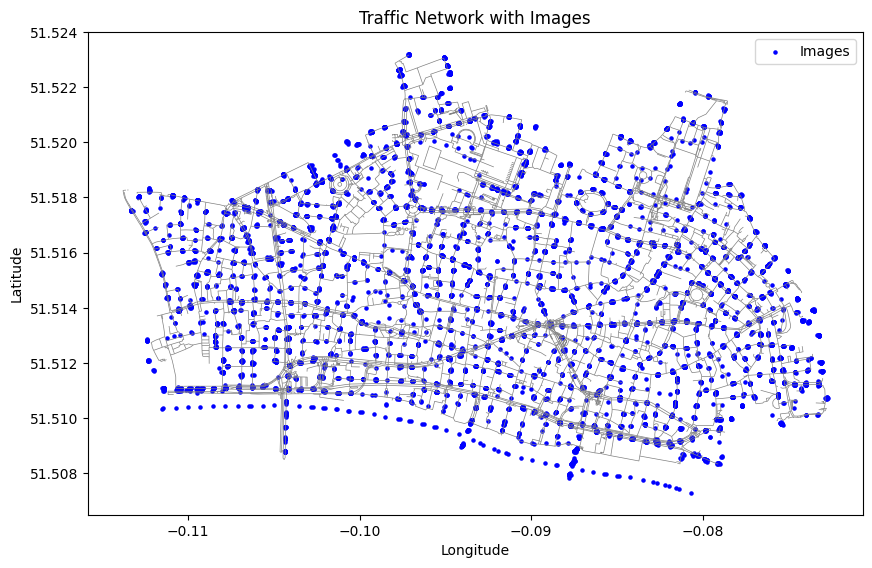

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Load street network data
# streets = gpd.read_file('streets.geojson')  # Replace with your data source

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3', ...],
#     'lng': [-0.10543, -0.0949, -0.10601, ...],
#     'lat': [51.51575, 51.51736, 51.51575, ...]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, streets, how='left', distance_col='distance')
# Function to get coordinates by image ID
def get_coords_by_image_id(image_id):
    row = matched[matched['image_id'] == image_id]
    if not row.empty:
        return row['geometry'].values[0].x, row['geometry'].values[0].y
    else:
        return None, None

# Visualize the traffic network with images
fig, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, color='gray', linewidth=0.5)
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images')
plt.legend()

plt.show()

In [63]:
matched.explore()
